In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../data/electric_production.csv", index_col=0)

In [4]:
data.head()

,Value
DATE,
01-01-1985,72.5052
02-01-1985,70.6720
03-01-1985,62.4502
04-01-1985,57.4714
05-01-1985,55.3151


In [5]:
data.index = pd.to_datetime(data.index)
data.index.freq = 'MS'
data.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [6]:
data.columns = ['Electric Production']

In [10]:
time_series = data[data.index.year >=int(1985) ]
time_series.head()

,Electric Production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


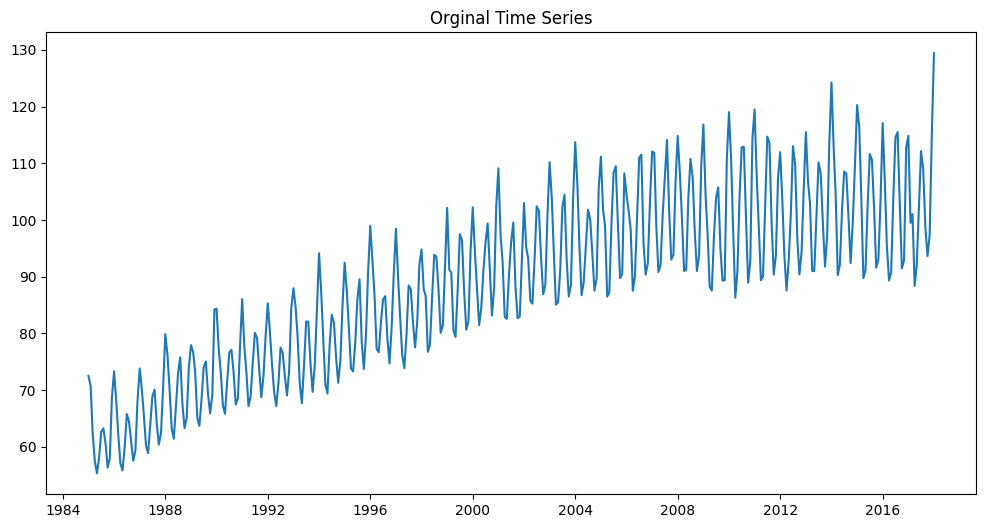

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(time_series)

plt.title("Orginal Time Series")
plt.show()

# Use multiplicative to analyse

<Figure size 1200x600 with 0 Axes>

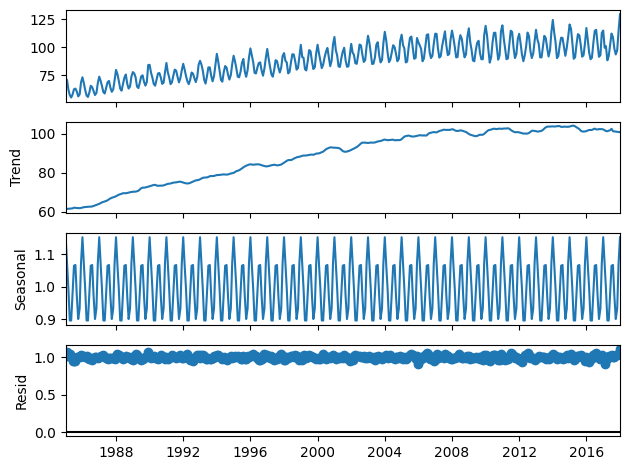

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(12, 6))
result = seasonal_decompose(data, model='multiplicative', extrapolate_trend='freq')
result.plot()
plt.show()

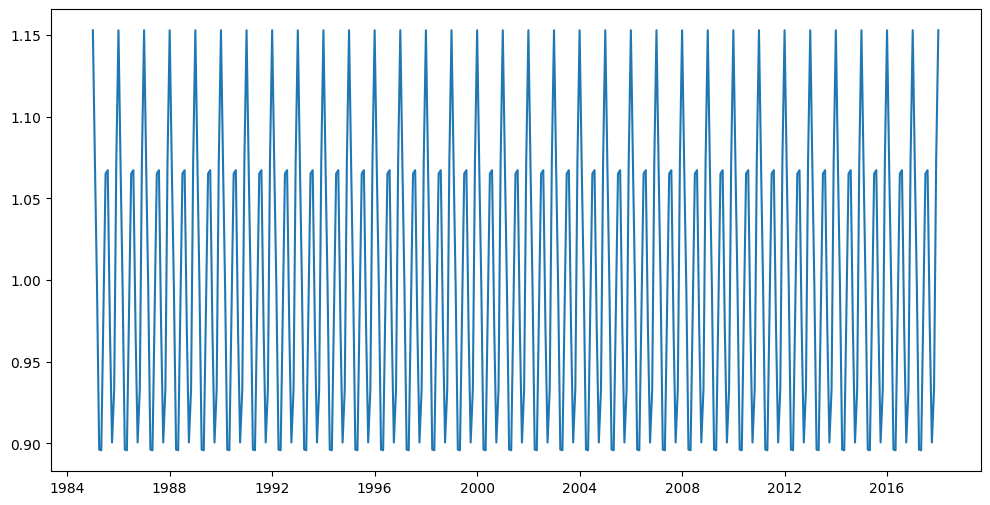

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(result.seasonal)

## Use auto_Arima to build model

In [16]:
train = time_series['1985-01-01':'2013-12-01']
test = time_series['2014-01-01':]
test.shape

(49, 1)

In [17]:
from pmdarima import auto_arima

In [18]:
auto_model = auto_arima(train, max_p=12, max_q=12, m=12, d= 1, 
                        start_P=1, seasonal= True, D=1,trace=True,
                        error_action='ignore', suppress_warnings=True,
                        stepwise=True)

c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1507.552, Time=0.82 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1699.406, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1638.757, Time=0.17 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1551.746, Time=0.21 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1505.970, Time=0.64 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,1,0)[12]             : AIC=inf, Time=0.39 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,1,2)[12]             : AIC=1507.314, Time=1.31 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1573.715, Time=0.63 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,1,2)[12]             : AIC=1507.089, Time=1.90 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1504.508, Time=0.51 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=inf, Time=0.20 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1506.145, Time=0.53 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,1,2)[12]             : AIC=1505.932, Time=0.83 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,1,0)[12]             : AIC=1575.398, Time=0.34 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,1,2)[12]             : AIC=1505.524, Time=1.41 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1508.467, Time=0.29 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1505.377, Time=0.32 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,1,1)[12]             : AIC=1508.250, Time=1.11 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,1,1)[12]             : AIC=1506.224, Time=0.36 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1505.041, Time=0.52 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,1,1)[12]             : AIC=1507.113, Time=1.12 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,1,1)[12] intercept   : AIC=1502.783, Time=0.92 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,1,0)[12] intercept   : AIC=inf, Time=0.58 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,1,1)[12] intercept   : AIC=1504.309, Time=1.69 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,1,2)[12] intercept   : AIC=1504.039, Time=2.67 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,1,0)[12] intercept   : AIC=inf, Time=1.23 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,1,2)[12] intercept   : AIC=1503.540, Time=3.54 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,1,1)[12] intercept   : AIC=1508.964, Time=0.58 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,1,1)[12] intercept   : AIC=1503.304, Time=1.01 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,1,1)[12] intercept   : AIC=1504.141, Time=1.58 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,1,1)[12] intercept   : AIC=1508.399, Time=1.82 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=1553.744, Time=0.25 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,1,1)[12] intercept   : AIC=1505.237, Time=1.25 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,1,1)[12] intercept   : AIC=1503.293, Time=1.39 sec


c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,1,1)[12] intercept   : AIC=1506.600, Time=2.16 sec

Best model:  ARIMA(1,1,2)(0,1,1)[12] intercept
Total fit time: 34.365 seconds


In [19]:
print(auto_model.aic())

1502.7825528544245


In [20]:
auto_model

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [21]:
auto_model.fit(train)

c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [22]:
future_forecast = auto_model.predict(n_periods=len(test))

c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [23]:
future_forecast = pd.DataFrame(future_forecast, index = test.index, columns=["Predictions"])
future_forecast.head()

,Predictions
DATE,
2014-01-01,118.363530
2014-02-01,108.257813
2014-03-01,100.302394
2014-04-01,90.311737
2014-05-01,91.934274


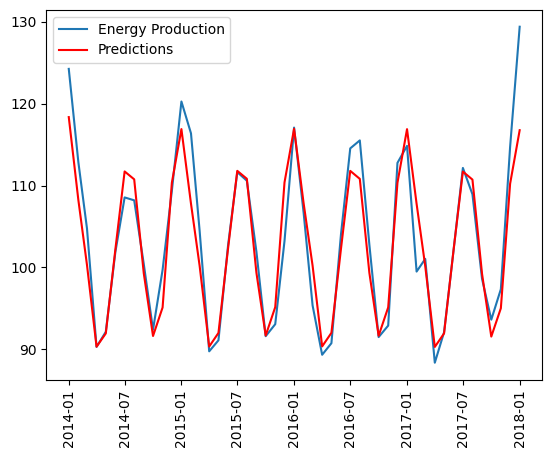

In [24]:
plt.plot(test, label="Energy Production")
plt.plot(future_forecast, label="Predictions", color='red')
plt.xticks(rotation="vertical")
plt.legend()
plt.show()

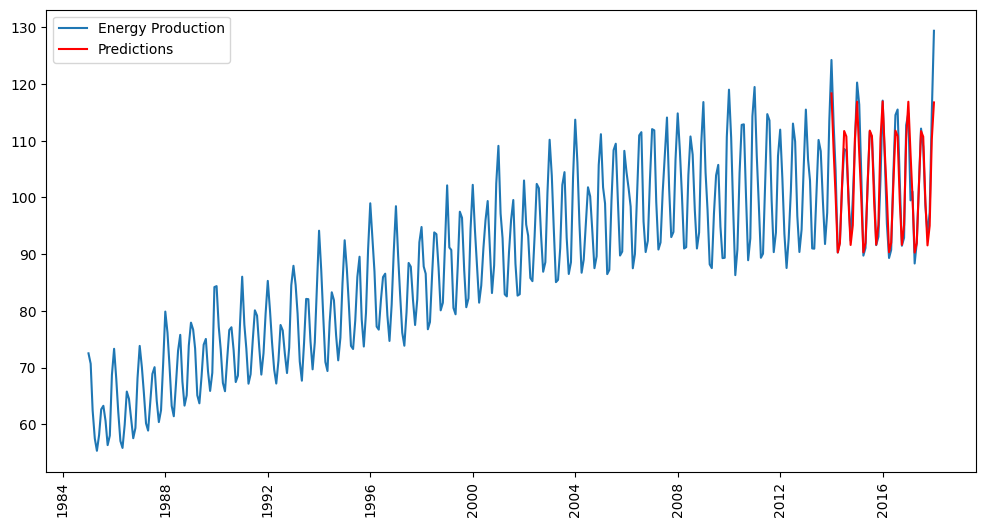

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(data, label="Energy Production")
plt.plot(future_forecast, label="Predictions", color='red')
plt.xticks(rotation="vertical")
plt.legend()
plt.show()

In [28]:
future_forecast = auto_model.predict(n_periods=len(test)+12)
future_forecast

c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


2014-01-01    118.363530
2014-02-01    108.257813
2014-03-01    100.302394
2014-04-01     90.311737
2014-05-01     91.934274
                 ...    
2018-09-01     99.053767
2018-10-01     91.361519
2018-11-01     94.815740
2018-12-01    110.022153
2019-01-01    116.559089
Freq: MS, Length: 61, dtype: float64

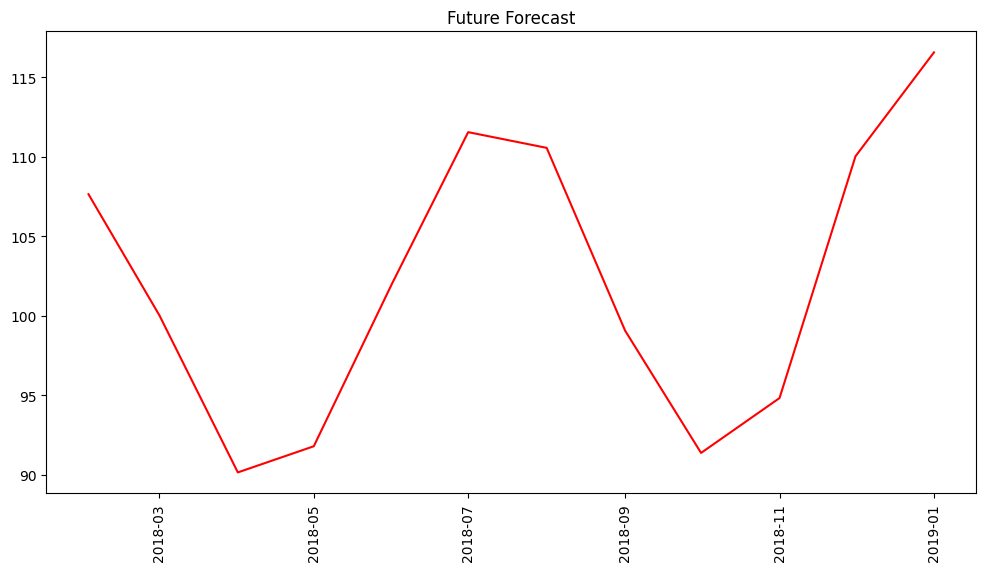

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(future_forecast[len(test):], color="red")
plt.xticks(rotation="vertical")
plt.title("Future Forecast")
plt.show()

In [30]:
future_forecast[len(test)]

107.63608486778276

In [37]:
months = pd.date_range('2015-08-01', '2016-07-01', freq='MS').strftime('%Y-%m-%d').tolist()

In [38]:
months

['2015-08-01',
 '2015-09-01',
 '2015-10-01',
 '2015-11-01',
 '2015-12-01',
 '2016-01-01',
 '2016-02-01',
 '2016-03-01',
 '2016-04-01',
 '2016-05-01',
 '2016-06-01',
 '2016-07-01']

In [39]:
new_predict = pd.DataFrame({
    "Date" : months,
    "Energy Production" : future_forecast[len(test):]
})
new_predict

,Date,Energy Production
2018-02-01,2015-08-01,107.636085
2018-03-01,2015-09-01,100.020822
2018-04-01,2015-10-01,90.137474
2018-05-01,2015-11-01,91.782192
2018-06-01,2015-12-01,102.040986
2018-07-01,2016-01-01,111.542309
2018-08-01,2016-02-01,110.554378
2018-09-01,2016-03-01,99.053767
2018-10-01,2016-04-01,91.361519
2018-11-01,2016-05-01,94.815740
